In [36]:
from raspi_import import raspi_import
import os

os.system("sh sample.sh")
data = raspi_import("data/adcData.bin")

In [12]:
from raspi_import import raspi_import

data = raspi_import("data/adcData.bin")

print(data[1])

[[2740 2012 2124 2105 2118]
 [2755 2013 2091 2075 2081]
 [2764 2022 2111 2099 2098]
 ...
 [2312 2517 2056 2036 2017]
 [2312 2518 2063 2042 2026]
 [2309 2518 2066 2044 2032]]


In [62]:
import numpy as np
from numpy.lib.stride_tricks import as_strided
from numpy import *
from matplotlib.pyplot import *
import scipy.signal as sig
#import scipy.signal as sig

def _check_arg(x, xname):
    x = np.asarray(x)
    if x.ndim != 1:
        raise ValueError('%s must be one-dimensional.' % xname)
    return x

def crosscorrelation(x, y, maxlag):
    """
    Cross correlation with a maximum number of lags.

    `x` and `y` must be one-dimensional numpy arrays with the same length.

    This computes the same result as
        numpy.correlate(x, y, mode='full')[len(a)-maxlag-1:len(a)+maxlag]

    The return vaue has length 2*maxlag + 1.
    """
    x = _check_arg(x, 'x')
    y = _check_arg(y, 'y')
    py = np.pad(y.conj(), 2*maxlag, mode='constant')
    T = as_strided(py[2*maxlag:], shape=(2*maxlag+1, len(y) + 2*maxlag),
                   strides=(-py.strides[0], py.strides[0]))
    px = np.pad(x, maxlag, mode='constant')
    return T.dot(px)
def maxindex(array, maxlag):
    result = np.argmax(abs(array))
    return result-(array.size+1)/2
def signalAngel(arrMic1, arrMic2, arrMic3, maxlag, ploting=False):
    
    x, HpassCoeff = sig.butter(4, 0.02, btype='high', analog=False, output='ba', fs=None)
    filteredMic1 = sig.filtfilt(x, HpassCoeff, arrMic1)
    filteredMic2 = sig.filtfilt(x, HpassCoeff, arrMic2)
    filteredMic3 = sig.filtfilt(x, HpassCoeff, arrMic3)
    
    crosscorr1_2 = sig.correlate(filteredMic1, filteredMic2)
    crosscorr2_3 = sig.correlate(filteredMic2, filteredMic3)
    crosscorr1_3 = sig.correlate(filteredMic1, filteredMic3)    
    t = linspace(-crosscorr1_2.size/2-1, crosscorr1_2.size/2+1, crosscorr1_2.size)
    if ploting:
        print("Mic1")
        plotSig(filteredMic1)
        print("Mic2")
        plotSig(filteredMic2)
        print("Mic3")
        plotSig(filteredMic3)
        print("Cross Corrolation Mic1_2")
        plot(t,crosscorr1_2)
        show()
        print("Cross Corrolation Mic2_3")
        plot(t,crosscorr2_3)
        show()
        print("Cross Corrolation Mic1_3")
        plot(t,crosscorr1_3)
        show()
    #print(crosscorr1_2)
    #print(crosscorr2_3)
    #print(crosscorr3_1)
    indexMax1_2 = maxindex(crosscorr1_2, maxlag)
    indexMax2_3 = maxindex(crosscorr2_3, maxlag)
    indexMax1_3 = maxindex(crosscorr1_3, maxlag)
    #print(indexMax1_2)
    #print(indexMax2_3)
    #print(indexMax1_3)
    rad = np.arctan(np.sqrt(3)*(indexMax1_2+indexMax1_3)/(indexMax1_2-indexMax1_3-2*indexMax2_3))
    #print("angel: "+ str(angel/(np.pi)*180))
    return rad/(np.pi)*180

def plotSig(signal):
    t = linspace(0,1, signal.size)
    plot(t, signal)
    show()

In [48]:
radarI = data[1][:,0]
radarQ = data[1][:,1]

49.0


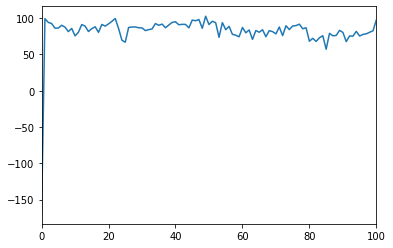

In [8]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np

def offsetvalue(data):
    size = 0
    total = 0
    for signals in data:
        total += signals
        size += 1
    return total/size

radarI = data[1][:,0]
radarQ = data[1][:,1]

#print(offsetvalue(radarI))
#print(offsetvalue(radarQ))

radarI = radarI-offsetvalue(radarI)
radarQ = radarQ-offsetvalue(radarQ)

iq = radarI#+1j*radarQ
#print(dataobj)
f_s = 31250
t = np.linspace(-f_s/2,f_s/2,iq.shape[0])

sp = np.fft.fft(iq)
#print(len(dataobj.real))
freq = np.fft.fftfreq(iq.size, d=32e-6)
#freq = np.fft.fftfreq(t.shape[-1])
#print(freq)

#plt.xscale('log')
#plt.yscale('log')

#f_d = np.argmax(np.abs(sp))-(f_s/2)
f_d = freq[np.argmax(abs(sp.imag))]
print(f_d)
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(20*np.log10(np.abs(sp))))
plt.xlim(0, 100)
plt.show()

In [160]:
f_0 = 24.13*10**9
c = 3*10**8
V_r = f_d*c/(2*f_0)
print("Doplershift ferq %f Hz" % (f_d))
print("Speed %f m/s" % (V_r))

Doplershift ferq 49.000000 Hz
Speed 0.304600 m/s


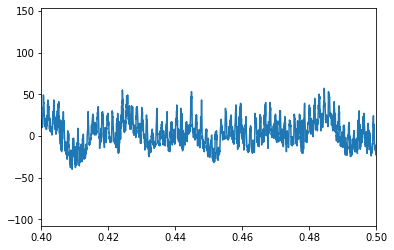

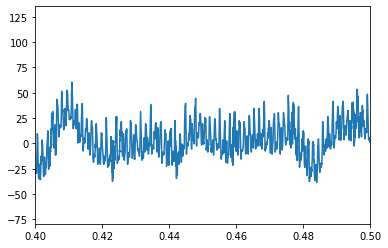

In [13]:
from numpy import *
from matplotlib.pyplot import *
    
t = linspace(0,1, radarI.size)
plot(t,radarI)
plt.xlim(0.4, .5)
show()
plot(t,radarQ)
plt.xlim(0.4, .5)
show()

In [136]:
freq

array([ 0.,  1.,  2., ..., -3., -2., -1.])